<a href="https://colab.research.google.com/github/Faycal99/Recommendation_System_For_Sports/blob/main/RecommendationSystemFirstTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recommendation System for sports based on differnt parameters including age,weight heigh, gender....etc

In [181]:
import pandas as pd
file_path ='/gym recommendation.xlsx'
df = pd.read_excel(file_path)  # Update with the exact filename
df.head()
df.shape[0]

14589

Feauture normalization and cleaning

In [182]:
#We drop uneceassary data from the table like bmi and level beacause we can calculate them from the height and the weight
df = df.drop(columns=['BMI','Level'])
df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,Male,18,1.68,47.5,No,No,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,Male,18,1.68,47.5,Yes,No,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,Male,18,1.68,47.5,No,Yes,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,Male,18,1.68,47.5,Yes,Yes,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,Male,18,1.68,47.5,No,No,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [183]:
#Encoding categorical values to numerical values in order to make machine learning algorithms understand them.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
#we do the same for [Hypertension ,	Diabetes, 	Fitness Goal, 	Fitness Type]
df['Hypertension'] = label_encoder.fit_transform(df['Hypertension'])
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['Fitness Goal'] = label_encoder.fit_transform(df['Fitness Goal'])
df['Fitness Type'] = label_encoder.fit_transform(df['Fitness Type'])
df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,1,18,1.68,47.5,0,0,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,1,18,1.68,47.5,1,0,0,1,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,1,18,1.68,47.5,0,1,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,1,18,1.68,47.5,1,1,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,1,18,1.68,47.5,0,0,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


Normalization of age height and weight to be between -1 and 1

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])
df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,1,-1.63391,-0.202298,-1.14858,0,0,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,1,-1.63391,-0.202298,-1.14858,1,0,0,1,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,1,-1.63391,-0.202298,-1.14858,0,1,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,1,-1.63391,-0.202298,-1.14858,1,1,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,1,-1.63391,-0.202298,-1.14858,0,0,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [186]:
#now we should separate our dataset into inputs X matrix and Output Y (Recommendations)
X = df.drop(columns=['ID', 'Exercises', 'Equipment', 'Diet', 'Recommendation'])

#Y = df[['Exercises', 'Equipment', 'Diet', 'Recommendation']]


Split our dataframe into train set and test set

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# We'll use their original indices
train_idx = X_train.index
test_idx = X_test.index

Now we give one test user,and find the top N most similar users in the training set using content-based similarity based on feautures X

In [188]:
from sklearn.metrics.pairwise import cosine_similarity
def get_content_similar_users(test_user_vector, X_train, top_n=5):
    similarity = cosine_similarity(test_user_vector, X_train)
    top_indices = similarity[0].argsort()[::-1][:top_n]
    return train_idx[top_indices], similarity[0][top_indices]

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Combine item-based fields
items_df = df[['Exercises', 'Diet', 'Equipment']].fillna('')

# Create pseudo-items string
df['combined_items'] = df['Exercises'].astype(str) + ' | ' + df['Diet'].astype(str) + ' | ' + df['Equipment'].astype(str)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['combined_items'])

# Split into train and test
item_train = tfidf_matrix[train_idx]
item_test = tfidf_matrix[test_idx]

In [190]:
def get_cf_similar_users(test_user_items, item_train, top_n=5):
    sim = cosine_similarity(test_user_items, item_train)
    top_indices = sim[0].argsort()[::-1][:top_n]
    return train_idx[top_indices], sim[0][top_indices]

In [191]:
def hybrid_recommendation(test_row_pos, alpha=0.5, top_n=5):
    test_user_vector = X_test.iloc[[test_row_pos]]
    test_user_items = item_test[test_row_pos]

    content_users, content_scores = get_content_similar_users(test_user_vector, X_train, top_n)
    cf_users, cf_scores = get_cf_similar_users(test_user_items, item_train, top_n)
    content_users = list(content_users)
    cf_users = list(cf_users)
    all_users = list(set(content_users).union(set(cf_users)))
    hybrid_scores = {}

    for uid in all_users:
        c_score = content_scores[content_users.index(uid)] if uid in content_users else 0
        cf_score = cf_scores[cf_users.index(uid)] if uid in cf_users else 0
        hybrid_scores[uid] = alpha * c_score + (1 - alpha) * cf_score

    sorted_users = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    top_user_indices = [u[0] for u in sorted_users[:top_n]]

    return df.loc[top_user_indices, ['Exercises', 'Diet', 'Equipment', 'Recommendation']]




In [192]:
hybrid_recommendation(test_row_pos=1, alpha=0.5, top_n=1)


,Exercises,Diet,Equipment,Recommendation
13572,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Mixed greens, cherry tomatoes, cu...",Dumbbells and barbells,Follow a regular exercise schedule. Adhere to ...


In [193]:
test_user_idx = np.random.randint(0, item_test.shape[0])
true_items = set(df.loc[test_user_idx, 'combined_items'].split('|'))

In [194]:
test_user_vector = X_test.loc[test_user_idx].values.reshape(1, -1)

In [195]:
content_sim = cosine_similarity(test_user_vector, X_train)
content_top_indices = content_sim[0].argsort()[::-1][:5]
content_similar_users = train_idx[content_top_indices]


In [196]:
test_user_items = item_test[test_user_idx].toarray().reshape(1, -1)
cf_sim = cosine_similarity(test_user_items, item_train)
cf_top_indices = cf_sim[0].argsort()[::-1][:5]
cf_similar_users = train_idx[cf_top_indices]


In [198]:
# Union of content-based and CF similar users
similar_user_indices = list(set(content_similar_users).union(set(cf_similar_users)))


In [199]:
# True items for test user
true_items = df.loc[test_user_idx, 'combined_items'].split('|')
true_items = {item.strip() for item in true_items}

# Predicted items from similar users
predicted_items = set()
for idx in similar_user_indices:
    items = df.loc[idx, 'combined_items'].split('|')
    predicted_items.update({item.strip() for item in items})


In [200]:
def precision_recall_at_k(true_items, predicted_items, k=5):
    predicted_at_k = list(predicted_items)[:k]
    relevant = set(predicted_at_k).intersection(true_items)

    precision = len(relevant) / k
    recall = len(relevant) / len(true_items) if len(true_items) > 0 else 0
    return precision, recall

# Evaluate
precision, recall = precision_recall_at_k(true_items, predicted_items, k=5)
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")


Precision@5: 0.60
Recall@5: 1.00


In [231]:
total_precision = 0
total_recall = 0
num_users = item_test.shape[0]
num_users_ = 0
k=5
max_users = 10
test_indices = list(X_test.index)[:max_users]
train_idx = np.array(df.index[:len(X_train)])

for test_user_idx in range(df.shape[0]):

    try:
        # Get true items for this user
        row = df.iloc[test_user_idx]
        value = row['combined_items']
        true_items = {item.strip() for item in value.split('|')}

        # Content-based similarity
        test_user_vector = X_test.loc[test_user_idx].values.reshape(1, -1)
        content_sim = cosine_similarity(test_user_vector, X_train)
        content_top_indices = content_sim[0].argsort()[::-1][:5]
        #train_idx = np.array(train_idx)
        content_similar_users = train_idx[content_top_indices]

        # Collaborative filtering similarity
        test_user_items = item_test[num_users_].toarray().reshape(1, -1)
        num_users_ += 1
        cf_sim = cosine_similarity(test_user_items, item_train)
        cf_top_indices = cf_sim[0].argsort()[::-1][:5]
        cf_similar_users = train_idx[cf_top_indices]

        # Combine similar users
        similar_user_indices = list(set(content_similar_users).union(set(cf_similar_users)))

        # Predicted items from similar users
        predicted_items = set()
        for idx in similar_user_indices:
            items = df.loc[idx, 'combined_items'].split('|')
            predicted_items.update({item.strip() for item in items})

        # Evaluate
        precision, recall = precision_recall_at_k(true_items, predicted_items, k=5)
        total_precision += precision
        total_recall += recall
        print(f"✅ User {test_user_idx}: Precision@{k} = {precision:.2f}, Recall@{k} = {recall:.2f}")

    except KeyError as e:
        #print(f"❌ Error for user {test_user_idx}: {e} this is user in training")
        continue

# Compute average precision and recall
print(f"Number of users:{num_users_}")
avg_precision = total_precision / num_users
avg_recall = total_recall / num_users

print(f"Average Precision@5: {avg_precision:.2f}")
print(f"Average Recall@5: {avg_recall:.2f}")


✅ User 8: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 14: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 15: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 19: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 27: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 31: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 33: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 35: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 36: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 39: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 41: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 46: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 47: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 50: Precision@5 = 0.40, Recall@5 = 0.67
✅ User 59: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 63: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 68: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 70: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 79: Precision@5 = 0.20, Recall@5 = 0.33
✅ User 83: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 95: Precision@5 = 0.00, Recall@5 = 0.00
✅ User 99: Pre

In [52]:
print("Number of instances in X_test:", X_test.shape[0])


Number of instances in X_test: 2918


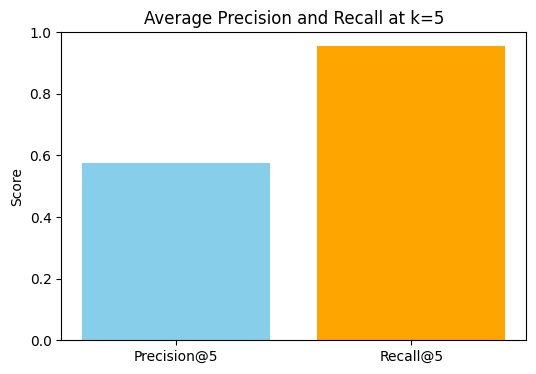

In [209]:
import matplotlib.pyplot as plt

metrics = ['Precision@5', 'Recall@5']
scores = [avg_precision, avg_recall]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['skyblue', 'orange'])
plt.ylim(0, 1)
plt.title('Average Precision and Recall at k=5')
plt.ylabel('Score')
plt.show()

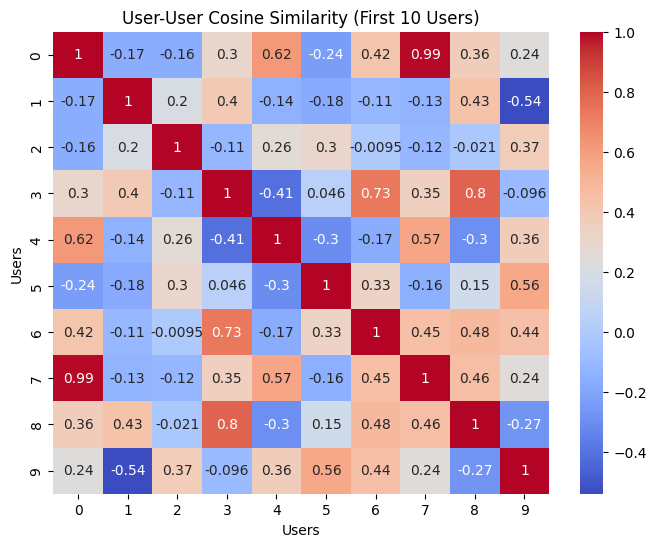

In [212]:
import seaborn as sns

similarity_matrix = cosine_similarity(X_test[:10])  # only show first 10 for clarity

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm')
plt.title('User-User Cosine Similarity (First 10 Users)')
plt.xlabel('Users')
plt.ylabel('Users')
plt.show()

In [220]:
features = ['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'Fitness Goal', 'Fitness Type']
scaler = StandardScaler()
X_train = scaler.fit_transform(df[features])
def hybrid_recommendation(new_user_dict, df, X_train, item_train, train_idx, k=5):
    # Step 1: Add new user
    user_df = pd.DataFrame([list(new_user_dict.values())])
    user_scaled = scaler.transform(user_df)

    # === Content-based similarity ===
    content_sim = cosine_similarity(user_scaled, X_train)[0]
    top_content_idx = content_sim.argsort()[::-1][:5]
    content_users = train_idx[top_content_idx]

    # === Collaborative filtering similarity ===
    # Simulate new user item vector (e.g., all zeros for cold start)
    new_user_items = np.zeros((1, item_train.shape[1]))
    cf_sim = cosine_similarity(new_user_items, item_train)[0]
    top_cf_idx = cf_sim.argsort()[::-1][:5]
    cf_users = train_idx[top_cf_idx]

    # === Combine similar users ===
    hybrid_users = list(set(content_users).union(set(cf_users)))

    # === Aggregate Recommendations ===
    predicted_items = set()
    for idx in hybrid_users:
        if pd.notnull(df.loc[idx, 'combined_items']):
            items = df.loc[idx, 'combined_items'].split('|')
            predicted_items.update({item.strip() for item in items})

    return list(predicted_items)[:k]

In [226]:
# === 3. Example Input ===
new_user = {
    'Sex': 1,
    'Age': 40,
    'Height': 1.72,
    'Weight': 99.0,
    'Hypertension': 0,
    'Diabetes': 1,
    'Fitness Goal': 1,
    'Fitness Type': 0
}

# Call function
recommendations = hybrid_recommendation(new_user, df, X_train, item_train, df.index, k=5)

# Print result
print("✅ Hybrid Recommendations for the new user:")
for r in recommendations:
    print("➡️", r)

✅ Hybrid Recommendations for the new user:
➡️ Vegetables: (Carrots, Sweet Potato, and Lettuce); Protein Intake: (Red meats, poultry, fish, eggs, dairy products, legumes, and nuts); Juice: (Fruit juice, watermelon juice, carrot juice, apple juice and mango juice)
➡️ Brisk walking, cycling, swimming, running , or dancing.
➡️ Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)
➡️ Ellipticals, Indoor Rowers,Treadmills, Rowing machine
➡️ Kettlebell, Dumbbells, Yoga Mat


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
